I need to find out what are Eclipsing Binaries in S82, if any. Quick google search didn't bring up anything useful. I finally found the Drake 2014 catalog : perhaps I can select objects by ra, dec :




In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy.coordinates import SkyCoord



In [2]:
pwd

'/Users/chris/Desktop'

In [3]:
table = Table.read('Drake_2014_Table_3.txt', format='ascii.cds')

In [4]:
radec = np.zeros(len(table['RAh'].data.data), dtype='<U30')

for i in range(len(table['RAh'].data.data)):
    radec[i] = str(table['RAh'].data.data[i]) + ' '  \
          + str(table['RAm'].data.data[i]) + ' '  \
          + str(table['RAs'].data.data[i]) + ' '  \
          + str(table['DE-'].data.data[i]) + str(table['DEd'].data.data[i]) + ' '  \
          + str(table['DEm'].data.data[i]) + ' '  \
          + str(table['DEs'].data.data[i])

In [5]:
radec_astropy = SkyCoord(radec, unit=(u.hourangle, u.deg))

In [6]:
table[:2]

CSS,RAh,RAm,RAs,DE-,DEd,DEm,DEs,<Vmag>,PF,AV,Class,f_Class
,h,min,s,,deg,arcmin,arcsec,mag,d,mag,,
str20,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,int64,str1
CSS_J000020.4+103118,0,0,20.41,+,10,31,18.9,14.62,1.491758,2.39,2,d
CSS_J000031.5-084652,0,0,31.5,-,8,46,52.3,14.14,0.404185,0.12,1,--


In [32]:
# compare that to the first row ....
radec_astropy.dec

<Latitude [ 10.52191667, -8.78119444, 41.46825   ,...,  37.18611111,
            38.38486111, 29.11080556] deg>

In [40]:
radec_astropy.ra.value

array([  8.50416667e-02,   1.31250000e-01,   1.53916667e-01, ...,
         3.59945083e+02,   3.59950833e+02,   3.59970625e+02])

In [41]:
radec_astropy.dec.value

array([ 10.52191667,  -8.78119444,  41.46825   , ...,  37.18611111,
        38.38486111,  29.11080556])

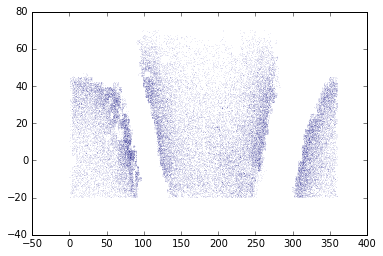

In [45]:
# Display coverage of data....
%matplotlib inline
plt.scatter(radec_astropy.ra.value, radec_astropy.dec.value, lw=0, s=0.05)


In [7]:
# choose data only within S82 footprint...

mask_ra = ( 300 < radec_astropy.ra.value )  | (  radec_astropy.ra.value < 60 ) 
mask_dec = ( -1.3 < radec_astropy.dec.value) * (radec_astropy.dec.value < 1.3 ) 

mask_S82 = mask_ra * mask_dec
N_tot = np.sum(mask_S82)
print('Number of objects in S82 footprint is %d '%N_tot)

Number of objects in S82 footprint is 623 


Now, "The eclipsing variables in our data were generally divided into a contact and semi-detached binary (EW/EB) group and detached systems (EA)".   These correspond to Class 1, 2  (see Table 2 ) 

In [8]:
table[mask_S82][table[mask_S82]['Class'] == 1]

CSS,RAh,RAm,RAs,DE-,DEd,DEm,DEs,<Vmag>,PF,AV,Class,f_Class
,h,min,s,,deg,arcmin,arcsec,mag,d,mag,,
str20,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,int64,str1
CSS_J003428.3+003818,0,34,28.31,+,0,38,18.8,14.54,0.274262,0.51,1,--
CSS_J003550.3-003145,0,35,50.32,-,0,31,45.6,17.03,0.278672,0.24,1,--
CSS_J003604.4-010814,0,36,4.44,-,1,8,14.6,16.43,0.310506,0.56,1,--
CSS_J003813.6+001611,0,38,13.66,+,0,16,11.5,16.69,0.23436,0.35,1,--
CSS_J003847.0-010012,0,38,47.05,-,1,0,12.8,13.82,0.471738,0.08,1,a
CSS_J004314.1+003520,0,43,14.14,+,0,35,20.6,14.47,0.256278,0.68,1,--
CSS_J004340.9-003413,0,43,40.96,-,0,34,13.6,15.89,0.394827,0.15,1,a
CSS_J004949.7-011212,0,49,49.72,-,1,12,12.2,14.55,0.365948,0.49,1,--


(array([ 31.,  22.,   8.,   2.,   2.,   2.,   1.,   2.,   0.,   1.]),
 array([ 0.249515 ,  0.8077155,  1.365916 ,  1.9241165,  2.482317 ,
         3.0405175,  3.598718 ,  4.1569185,  4.715119 ,  5.2733195,  5.83152  ]),
 <a list of 10 Patch objects>)

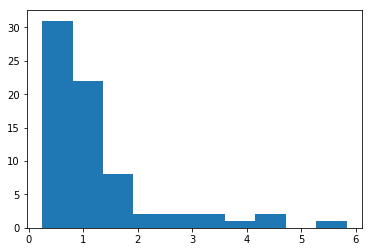

In [11]:
# Detached Systems:  Class 2  :
# plot distribution of periods 
%matplotlib inline
plt.hist(table[mask_S82][table[mask_S82]['Class'] == 2]['PF'])
plt.title('S82 ')

In [56]:
# Choose a single EB, that has a period of 0.23 days, extract the lightcurve ... 
# CSS_J003813.6+001611 : 
# V mag  =  16.69
# Period = 0.23436 days 
# Amplitude  : 0.35 mag 

# coords in PDAC-digestible format : 
# 00 38 13.6  +00 16 11

In [57]:
# Choose a single RR Lyr ... 

# RRab
table[mask_S82][table[mask_S82]['Class'] == 4]

CSS,RAh,RAm,RAs,DE-,DEd,DEm,DEs,<Vmag>,PF,AV,Class,f_Class
,h,min,s,,deg,arcmin,arcsec,mag,d,mag,,
str20,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,int64,str1
CSS_J010045.1-010212,1,0,45.11,-,1,2,12.0,16.33,0.5013599,0.53,4,--
CSS_J010229.0-000334,1,2,29.07,-,0,3,34.3,15.7,0.6354628,0.46,4,--
CSS_J013709.4+001208,1,37,9.41,+,0,12,8.9,17.57,0.641685,0.28,4,--
CSS_J014929.7+000918,1,49,29.74,+,0,9,18.6,16.92,0.6827919,0.18,4,--
CSS_J015128.4+011457,1,51,28.47,+,1,14,57.3,17.13,0.499791,1.09,4,--
CSS_J015225.1-001712,1,52,25.14,-,0,17,12.3,15.42,0.797843,0.44,4,--
CSS_J020943.4-010841,2,9,43.45,-,1,8,41.1,17.29,0.649989,0.23,4,--
CSS_J030304.2+003029,3,3,4.24,+,0,30,29.8,17.91,0.6418724,0.34,4,--


In [ ]:
# RR Lyrae : 
# CSS_J013709.4+001208
# visual mag 17.57
# period : 0.641685 days, 
# amplidute 0.28 mag 


# 01 37 09.4 +00 12 08

# It's weird, because even within 3 arcsec I easily find objects in DeepSource .... 

# Deep Source at 01 37 09.4 +00 12 08  ,  3 arcsec : find   ifd 2999473357723312

# with coadd_filter_id = 2 .  The weird thing is that there seems to be no i-band coadd for this source,  
# since only id for coadd_filter_id=3  was inherited by Deep Forced Source ...

